<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
#from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
#import seaborn as sns

In [ ]:
data = pd.read_csv('/datasets/insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


**Разделим данные на тренировочную выборку и целевой признак**

In [ ]:
features=data.drop(['Страховые выплаты'],axis=1)
target=data['Страховые выплаты']

**Определим тестовую и тренировочную выборку**

In [ ]:
train_features, test_features, train_target, test_target = train_test_split(features,target, test_size=0.25, random_state=254)

**Проверим результат**

In [ ]:
tv=train_features.shape[0]/features.shape[0]
tt=test_target.shape[0]/target.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(tv))
print('Размер тестовой выборки - {:.0%}'.format(tt))

Размер тренировочной выборки- 75%
Размер тестовой выборки - 25%


**Вывод:**

Все данные на месте и не требуют предобработки.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.*

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Параметры $𝑤$ и $𝑤p$ связаны между собой следующим образом:

$$w = (X^T X)^{-1} X^T y$$

где $𝑤p$ - параметры линейной регрессии в преобразованной формуле, они оптимально подобраны для достижения наименьшей среднеквадратичной ошибки $𝑀𝑆𝐸(𝑋𝑤,𝑦)$ в задаче обучения.

    
Данные записи представляют задачу минимизации среднеквадратической ошибки $(MSE)$ для модели, где $𝑋$ - матрица признаков, $𝑦$ - вектор целевых значений, и $𝑤$ и $𝑤p$ - параметры модели.

Идея второго способа доказательства заключается в том, что мы можем свести задачу минимизации среднеквадратической ошибки для модели с преобразованными данными $𝑋p𝑤p$ к задаче минимизации среднеквадратической ошибки для модели с исходными данными $𝑋𝑤$.

Для этого мы делаем замену параметров модели: $𝑤 --> 𝑤p$. Затем мы видим, что задача минимизации среднеквадратической ошибки для модели с преобразованными данными сводится к той же самой задаче минимизации среднеквадратической ошибки, но для модели с исходными данными.

Таким образом, мы можем использовать результаты решения задачи минимизации среднеквадратической ошибки для модели с исходными данными, чтобы решить задачу минимизации среднеквадратической ошибки для модели с преобразованными данными.

$$w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$$

$P^T P = I$, где $I$ - единичная матрица.

Тогда:

$$w' = P^{-1} (X^T X)^{-1} (P^T P) P^{-1} P^T X^T y$$

Свойство обратной матрицы гласит, что $A^{-1} A = A A^{-1} = I$, где $I$ - единичная матрица.

Тогда:

$$w' = P^{-1} (X^T X)^{-1} I I X^T y$$

Учитывая, что $IX^T = X^T$ и $Iy = y$, получим:

$$w' = P^{-1} (X^T X)^{-1} X^T y$$


Получается, что соотношение между $w$ и $w_p$ такое, что $w_p = P^{-1}w$

Верно получено    
    
    
$$
w' = P^{-1}w
$$    
    
    
    
    
И продолжаем


$$    
a' = X\cdot P\cdot w'    
$$

то


$$    
a' = X\cdot P\cdot P^{-1}w    
$$

    
$$    
a' = X\cdot w    
$$
    
    

$$
a' = a
$$

Значит прогноз не изменится

**Создадим модель по исходным формулам для предсказания значений по неизменённым признакам**

In [ ]:
class LinearRegress:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [ ]:
model = LinearRegress()
model.fit(train_features, train_target)
predict = model.predict(test_features)

R2_score = r2_score(test_target, predict)
MSE = mean_squared_error(predict,test_target)

print("R2_score:", R2_score.round(2))
print("MSE:", MSE.round(2))

R2_score: 0.42
MSE: 0.11


**Вычислим значения R2 и MSE для предсказанных значений по исходным (неизменённым данным)**

In [ ]:
model_l = LinearRegression()
model_l.fit(train_features,train_target)
predictions= model_l.predict(test_features)

R2_score_l = r2_score(test_target, predictions)
MSE_l = mean_squared_error(predictions,test_target)

print("R2_score Линейной регрессии неизменённой матрицы:", R2_score_l.round(2))
print("MSE Линейной регрессии неизменённой матрицы:", MSE_l.round(2))

R2_score Линейной регрессии неизменённой матрицы: 0.42
MSE Линейной регрессии неизменённой матрицы: 0.11


**График зависимости значений истинные/предсказанные модели линейной регрессии из Scikit-learn**

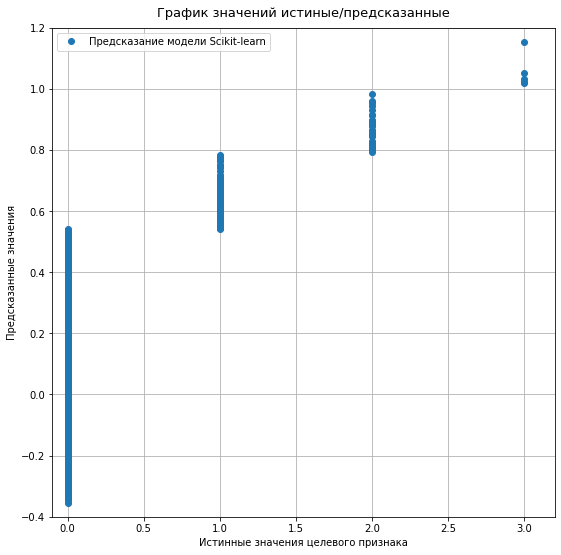

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(test_target,predictions,'o',alpha=1)
plt.legend(['Предсказание модели Scikit-learn'])
plt.xlim(-0.1,3.2)
plt.ylim(-0.4,1.2)
plt.title('График значений истиные/предсказанные', y=1.01, fontsize=13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

**Произведём изменение признаков исходной матрицы данных методом умножения их на произвольную обратимую матрицу**

In [ ]:
# Создадим произвольную матрицу по длине совпадающую с шириной нашей выборки
matrix=np.random.normal(3, size=(4,4))
matrix

array([[2.66525354, 3.14797779, 3.64427665, 3.73795975],
       [4.91035052, 3.61945778, 3.19448943, 2.06677602],
       [2.57289868, 1.11572206, 3.56352858, 3.6887287 ],
       [3.4888818 , 2.51398159, 1.22299594, 3.42596564]])

In [ ]:
# Проверим обратимость нашей матрицы
np.linalg.inv(matrix)

array([[-0.47574638,  0.25267547,  0.21283477,  0.13748168],
       [ 0.5075873 , -0.00934742, -0.51163869,  0.0027071 ],
       [ 0.10883803,  0.12648909,  0.19488277, -0.40488627],
       [ 0.07316164, -0.29561045,  0.08912934,  0.29443125]])

**Произведём умножение признаков на произвольную матрицу**

In [ ]:
# Тренировочная выборка
train_matrix=train_features.dot(matrix)
train_matrix.columns = train_features.columns
train_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
883,101478.814390,44037.971574,140471.333199,145382.739193
4736,128377.115771,55745.973745,177625.120379,183807.125401
4455,106673.715263,46305.610263,147630.335247,152780.864361
3993,127997.067140,55543.915095,177188.905285,183386.583130
651,104892.973531,45539.385684,145145.923210,150213.165717


In [ ]:
# Применим те же изменения для тестовой выборки и умножим на ту же матрицу
test_matrix = test_features.dot(matrix)
test_matrix.columns = test_features.columns
test_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
4948,97957.987094,42537.019999,135537.149300,140255.325384
4959,88990.105195,38658.103519,123083.990929,127363.715513
1728,97402.880768,42282.877424,134797.214886,139495.948285
4169,113086.320571,49080.437570,156526.378732,161994.419016
1984,114953.251619,49909.904465,159061.628600,164608.182352


**Проверим результат**

In [ ]:
model_t = LinearRegression()
model_t.fit(train_matrix,train_target)
predictions_t= model_t.predict(test_matrix)
print("R2_score Линейной регрессии изменённой матрицы:", r2_score(test_target,predictions_t).round(2))
print("MSE Линейной регрессии изменённой матрицы:", mean_squared_error(predictions_t,test_target).round(2))

R2_score Линейной регрессии изменённой матрицы: 0.42
MSE Линейной регрессии изменённой матрицы: 0.11


**Нанесём на график зависимости значений истинные/предсказанные модели линейной регрессии предсказанные значения модели на изменённых данных**

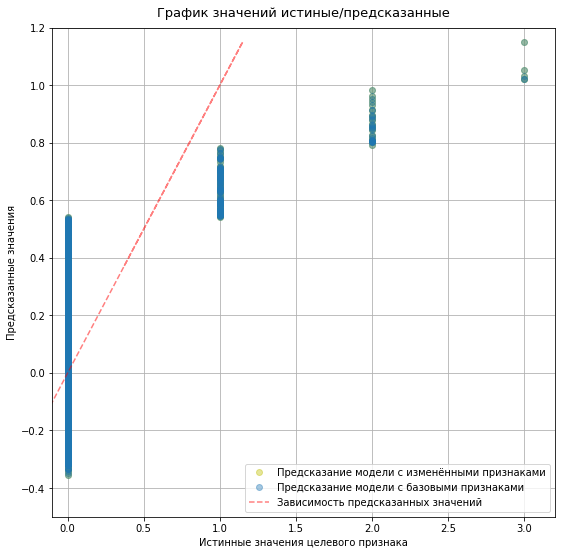

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(test_target,predictions_t,'yo',alpha=0.4)
plt.plot(test_target,predictions,'o',alpha=0.4)
plt.plot(predictions_t,predictions,'r--',alpha=0.5)
plt.legend(['Предсказание модели c изменёнными признаками', 'Предсказание модели c базовыми признаками', 'Зависимость предсказанных значений'])

plt.xlim(-0.1,3.2)
plt.ylim(-0.5,1.2)
plt.title('График значений истиные/предсказанные', y=1.01, fontsize=13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

**Ответ:**

Если признаки исходных данных умножить на обратимую матрицу, то качество линейной регрессии **не изменится**.

**Обоснование:**

Изменение качества предсказания линейной регрессии не происходит при умножении признаков исходных данных, на обратимую матрицу, т.к. параметры линейной регрессии в исходной задаче и в преобразованной связаны между собой алгоритмом преобразования признаков, по результату работы которого предсказание вычисляется методом умножения признаков исходных данных на вектор по длине равный ширине таблицы признаков, который в свою очередь умножается на целевые признаки. По результату скалярного умножения создаётся число, на которое умножается тестовая выборка, и если эта выборка была преобразована умножением на ту же матрицу, то качество предсказания не изменится.

Таким образом, если изменить исходные данные методом умножения признаков на обратимую матрицу, не изменяя значений целевого признака, качество предсказания модели не изменится.

## Алгоритм преобразования

**Алгоритм**

Умножение матрицы на матрицу возможно, если ширина первой матрицы $А(𝑚×𝑛)$ равна высоте второй матрицы $P (𝑛×r)$. Тогда размер произведения этих матриц будет $m×r$. Размерность n «cхлопывается».

При умножении признаков выборки $A$ размерностью $(3750,4)$ на обратимую произвольную матрицу $P$ размерностью $(4,4)$, результатом получаем новый (изменённый) набор данных скалярных произведений $M$ размернотью $(3750,4)$

Формула выглядит следующим образом:
$$Mij = (Ai,Bj)$$

В каждую новую ячейку записывается результат сложения произведений строки $i$ на столбец $j$. Так например в первой ячейке новой таблицы будет записан результат по этой формуле:
$$M_{11}=A_{11}×P_{11} + A_{12}×P_{21} + A_{13}×P_{31} + A_{14}×P_{41}$$

Далее вычисляется важный параметр - вектор $w$ по формуле:
$$w = (X^T X)^{-1} X^T y$$

В которой $X$ - таблица признков, где нулевой столбец заполнен $1$ (единицами), а $y$ - вектор целевого признака
$$X_{i} = (1  M_{i2} M_{i3} M_{i4} M_{i5})$$

В Линейной регрессии предсказания вычисляются по формуле:
$$a = Xw + w0$$

, где $w0$ - значение нулевого аргумента вектора $w$, которое предствляет собой величину сдвига модели, при подборе которого можно достигать более низкого значения среднеквадратичного отклонения $MSE$

Рассмотрим упрощённую запись формулы предсказания Линейной регрессии $a = X_i w$, где $X_i$ - новые строки признаков.

Подставим вместо параметра $w$, формулу её вычисления:
$$a = X_i w = X_i (X^T X)^{-1} X^T y$$

Упроситим формулу используя принцип ассоциативности ($A(BC) = (AB)C$) и то, что транспонированное произведение матриц равно произведению транспонированных матриц взятых в обратном порядке ($(AB)^T = B^T A^T$):
$$a = X_i (X^T X)^{-1} X^T y = X_iX^{-1}(X^T)^{-1}X^T y = X_iX^{-1}y$$

Домножим наши признаки на случайную матрицу $P$, в которой число строк равно числу столбцов $X$ и $P$ - обратима, то есть из матрицы $P$ можно получить матрицу $P^{-1}$, при этом $PP^{-1} = E$, где $E$ - единичная матрица

Если обучить нашу модель на новых (изменённых) признаках, то модель найдёт новые коэффициенты $w'$
$$w' = ((XP)^T(XP))^{-1}(XP)^Ty$$

Подставим их в формулу предсказания и упростим выражение
$$a'= X_iPw' = X_iP((XP)^T(XP))^{-1}(XP)^Ty = X_iP(XP)^{-1}((XP)^T)^{-1}(XP)^Ty = X_iX^{-1}y$$

Таким образом мы пришли к заключению, о том что результат предсказания не изменится не смотря на измениения признаков, т.к. исходя из результатов наших преобразований очевидно, что $a = a'$

**Алгоритм преобразования (план действий):**
1. Создаём рандомную матрицу $P$
2. Проверяем её на обратимость
3. Создаём новую матрицу данных $M$
4. Ищем метрики качества $R2score$ и $MSE$ на исходных данных и на преобразованных
5. Опишем вывод полученных результатов

Алгоритм преобразования:

1. Создание случайной матрицы P размерности (n, n), где n - размерность матрицы признаков A.

2. Проверка обратимости матрицы P. Если матрица необратима, переход к шагу 1 и создание новой случайной матрицы P.

3. Умножение матрицы признаков A на матрицу P. Результатом будет новая матрица M размерностью (m, n), где m - количество строк в матрице A.

4. Применяем те же изменения для тестовой выборки и умножим на ту же матрицу M

5. Вносим в нулевой столбец нашей изменённой таблицы значение 1

6. Оценка метрик качества (R2 score, MSE) на исходных данных и на преобразованных данных.

7. Вывод полученных результатов.


**Полное описание алгоритма:**
    
Алгоритм начинается с создания матрицы P размером 4x4, заполненной случайными значениями из нормального распределения. Затем проводится проверка обратимости матрицы P с помощью функции np.linalg.inv(). После этого применяется умножение признаков обучающей выборки на матрицу P и результат записывается в матрицу M. Аналогичные операции выполняются для тестовой выборки, и результат записывается в матрицу test_M. Затем к матрице M добавляется столбец из единиц, и переменной y присваиваются значения целевого признака обучающей выборки. Далее вычисляются веса модели по формуле w=(X^T * X)^-1 * X^T * y, где X - матрица M с добавленным столбцом из единиц. Производится предсказание модели для тестовой выборки a = test_M * w[1:] + w[0]. Затем проводится оценка качества модели с использованием метрик R2 и MSE. Наконец, строится график сравнения предсказанных значений истинных значений целевого признака, а также сравниваются значения метрик R2 и MSE для модели, полученной с использованием изменённых и неизменённых признаков.

**Обоснование**

Это значит, что если мы произведём умножение признаков тренировочной и тестовой выборок на одну и ту же обратимую матрицу, то результатом предсказания будет произведение нашей изменённой таблицы с признаками на вектор, который был получен из той же таблицы с изменёнными данными увеличенную на ту же величину, что и признаки тренировочных данных. Проверим работу данного алгоритма в следующей главе.

## Проверка алгоритма

In [ ]:
def get_rand_matrix():
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(4, 4))
        det = np.linalg.det(matrix)
    return matrix
P = get_rand_matrix()
print(P)

[[-0.24426908  1.24773429 -1.82681238  0.97363363]
 [ 1.81716817 -0.89682078  0.17104482 -0.97629087]
 [ 0.89379474 -0.63360809  0.83309544  0.09180612]
 [-0.34875255  1.53147351  2.49337302  1.78870011]]


In [ ]:
# Выполним умножение признаков на нашу новую матрицу и обозначим её M
M =train_features.dot(P)
M.columns = train_features.columns
M.head()

,Пол,Возраст,Зарплата,Члены семьи
883,35253.324570,-24981.460494,32830.045598,3598.447534
4736,44599.426315,-31594.847874,41497.200603,4526.868622
4455,37059.085733,-26257.644881,34497.946924,3772.296856
3993,44464.617636,-31509.066546,41409.614939,4542.095283
651,36436.017493,-25811.318440,33922.602326,3711.446094


In [ ]:
# Применим те же изменения для тестовой выборки и умножим на ту же матрицу M
test_M = test_features.dot(P)
test_M.columns = test_features.columns
test_M.head()

,Пол,Возраст,Зарплата,Члены семьи
4948,34030.842354,-24107.510567,31664.621889,3455.271952
4959,30912.661781,-21891.916492,28759.121054,3132.485270
1728,33839.956250,-23977.290411,31496.138927,3440.982432
4169,39286.303913,-27838.077822,36580.001341,4005.717308
1984,39933.068744,-28289.302387,37170.207432,4061.843498


In [ ]:
# Целевые признаки оставляем без изменений.
# Далее в нулевой столбец нашей изменённой таблицы вносим значение 1
X = np.concatenate((np.ones((M.shape[0], 1)), M), axis=1)

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4
0,1.0,35253.324570,-24981.460494,32830.045598,3598.447534
1,1.0,44599.426315,-31594.847874,41497.200603,4526.868622
2,1.0,37059.085733,-26257.644881,34497.946924,3772.296856
3,1.0,44464.617636,-31509.066546,41409.614939,4542.095283
4,1.0,36436.017493,-25811.318440,33922.602326,3711.446094


Присвоим переменной $у$, целевые признаки и вычислим по формуле ($w = (X^T X)^{-1} X^T y$) вектор $w$

In [ ]:
y = train_target
w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)

Вычислим предсказание модели методом умножения тестовой выборки $test_M$ и увеличим на величину сдвига значение $w0$. Переменную предсказанных значений обозначим $a$

In [ ]:
a = test_M.dot(w[1:]) + w[0]

In [ ]:
# Проверим значения R2 и MSE
R2_score_m=r2_score(test_target, a)
MSE_m=mean_squared_error(a, test_target)
print("R2_score:",R2_score_m.round(2))
print("MSE:", MSE_m.round(2))

R2_score: 0.42
MSE: 0.11


**Изобразим на графике предсказанные значения относительно истинных значений целевого столбца и сравним эти значения с предсказаниями модели по неизменённым признакам**

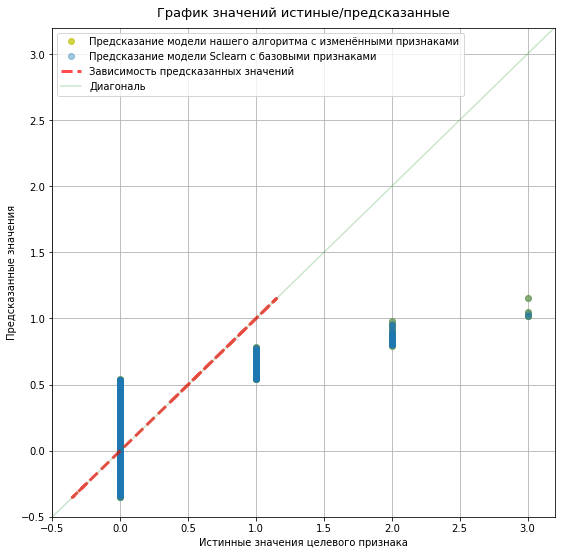

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(test_target,a,'yo',alpha=0.7)
plt.plot(test_target,predictions,'o',alpha=0.4)
plt.plot(a,predictions,'r--',alpha=0.7,linewidth = 3)
plt.plot([-0.5,3.2],[-0.5,3.2],linestyle='-',color='g',alpha=0.2)
plt.legend(['Предсказание модели нашего алгоритма c изменёнными признаками', 'Предсказание модели Sclearn c базовыми признаками','Зависимость предсказанных значений','Диагональ'])

plt.xlim(-0.5,3.2)
plt.ylim(-0.5,3.2)
plt.title('График значений истиные/предсказанные', y=1.01, fontsize=13)
plt.grid(True)
plt.xlabel('Истинные значения целевого признака')
plt.ylabel('Предсказанные значения')
plt.show()

In [ ]:
# Сравнение R2 и MSE изменённой/неизменённой матрицы признаков
comparison_tabl = pd.DataFrame(index=['R2_score','MSE'], columns=['Изменённая матрица','Неизменённая матрица'])
comparison_tabl['Изменённая матрица'] = R2_score_m, MSE_m
comparison_tabl['Неизменённая матрица'] = R2_score_l, MSE_l

comparison_tabl.T

,R2_score,MSE
Изменённая матрица,0.416687,0.112489
Неизменённая матрица,0.416687,0.112489


## Вывод

От нас требовалось защитить данные клиентов страховой компании «Хоть потоп» и разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Преобразование требовалось произвести таким образом, чтобы по результату работы нашего алгоритма, качество моделей машинного обучения не ухудшилось.

В результате нашей работы был разработан алгоритм, где данные были преобразованы методом умножения признаков исходных данных на обратимую матрицу. Результатом такого преобразования явилась новая (изменённая) матрица признаков, которая справилась с основными задачами по шифровке данных и при сравнении качества предсказаний с моделью из $Scikit-learn$, сохранила значения $R2$ и $MSE$ неизменными.

Таким образом поставленные задачи были выполнены.